In [1]:
# Import
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# get data
column_names = ['userId', 'movieId', 'rating', 'timestamp']
data = pd.read_csv('rating_sparse.csv', names=column_names, skiprows=1)
data.drop('timestamp', axis=1, inplace=True)

# Convert to user-item rating matrix
rating_matrix = data.pivot(index='userId', columns='movieId', values='rating')

FileNotFoundError: [Errno 2] No such file or directory: 'rating_sparse.csv'

In [3]:
# MSD function
def mean_square_difference(user1, user2):
    common_items = user1.dropna().index.intersection(user2.dropna().index)
    if len(common_items) == 0:
        return np.inf  # No common items
    return np.mean((user1[common_items] - user2[common_items]) ** 2)

# Pearson Similarity Function
def pearson_similarity(user1, user2):
    common_items = user1.dropna().index.intersection(user2.dropna().index)
    if len(common_items) == 0:
        return 0  # No common items

    ratings1 = user1[common_items].values
    ratings2 = user2[common_items].values

    mean1, mean2 = np.mean(ratings1), np.mean(ratings2)
    numerator = np.sum((ratings1 - mean1) * (ratings2 - mean2))
    denominator = np.sqrt(np.sum((ratings1 - mean1) ** 2)) * np.sqrt(np.sum((ratings2 - mean2) ** 2))
    
    if denominator == 0:
        return 0  # Avoid division by zero
    
    return numerator / denominator# Pearson Calculation

In [4]:
# MSD Calculation
msd_similarity = pd.DataFrame(index=rating_matrix.index, columns=rating_matrix.index)

for user1 in rating_matrix.index:
    for user2 in rating_matrix.index:
        msd_similarity.loc[user1, user2] = mean_square_difference(rating_matrix.loc[user1], rating_matrix.loc[user2])

msd_similarity = 1 / (1 + msd_similarity.astype(float))  # Convert MSD to similarity
msd_similarity.fillna(0, inplace=True)  # Handle NaN values

In [8]:
# Pearson Calculation
pearson_similarity_matrix = pd.DataFrame(index=rating_matrix.index, columns=rating_matrix.index)

for user1 in rating_matrix.index:
    for user2 in rating_matrix.index:
        if user1 != user2:  # Skip self-correlation
            pearson_similarity_matrix.loc[user1, user2] = pearson_similarity(rating_matrix.loc[user1], rating_matrix.loc[user2])
        else:
            pearson_similarity_matrix.loc[user1, user2] = 1  # Self-similarity is 1

pearson_similarity_matrix.fillna(0, inplace=True)  # Handle NaN values
pearson_similarity_matrix = (pearson_similarity_matrix + 1) / 2

In [10]:
# Cosine Calculation
filled_rating_matrix = rating_matrix.fillna(0)
cosine_similarity_matrix = pd.DataFrame(
    cosine_similarity(filled_rating_matrix),
    index=rating_matrix.index,
    columns=rating_matrix.index
)

In [13]:
# Print
print("\nPearson Similarity Matrix:")
print(pearson_similarity_matrix)


Pearson Similarity Matrix:
userId        1         2         3         4         5         6         7   \
userId                                                                         
1            1.0  0.606429  0.291031  0.580196  0.644478  0.457199  0.361602   
2       0.606429       1.0       0.5  0.589936       1.0  0.220673  0.366229   
3       0.291031       0.5       1.0  0.396461  0.336337  0.720573  0.700142   
4       0.580196  0.589936  0.396461       1.0  0.783055  0.367642  0.447472   
5       0.644478       1.0  0.336337  0.783055       1.0  0.376063  0.660817   
6       0.457199  0.220673  0.720573  0.367642  0.376063       1.0  0.619085   
7       0.361602  0.366229  0.700142  0.447472  0.660817  0.619085       1.0   
8       0.560327  0.619728  0.179871  0.582434  0.388845  0.383661  0.348388   
9       0.789474  0.833333       0.5  0.562862  0.907741  0.508139  0.678452   
10      0.576027  0.819532  0.426329  0.350832  0.466793  0.432474  0.263337   
11      0.60

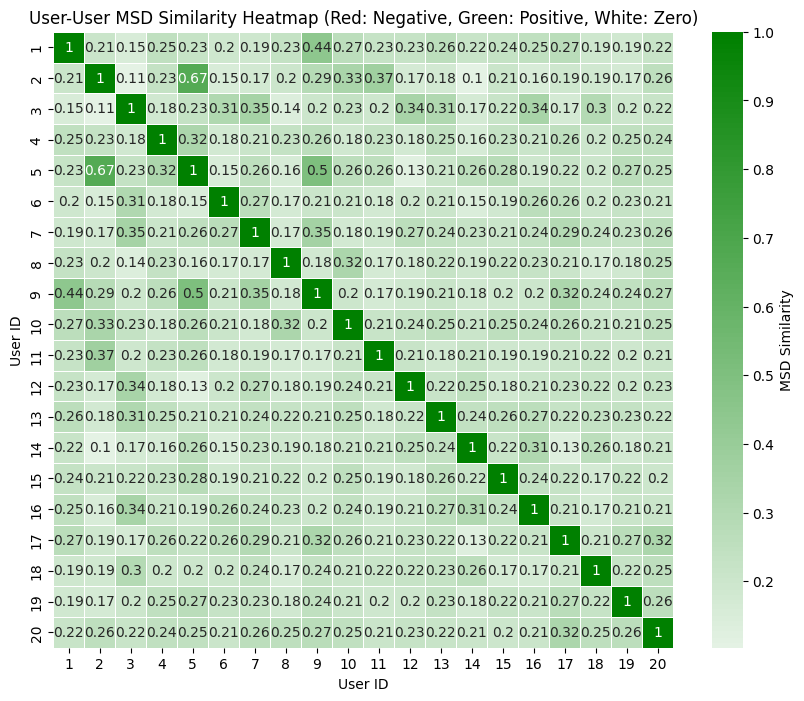

In [25]:
# Plot MSD

#cmap config for mapplotlib
cmap = LinearSegmentedColormap.from_list(
    'green_red_white', 
    ['red', 'white', 'green'], 
    N=256
)

plt.figure(figsize=(10, 8))
sns.heatmap(msd_similarity, annot=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={'label': 'MSD Similarity'})

# Title and labels
plt.title("User-User MSD Similarity Heatmap (Red: Negative, Green: Positive, White: Zero)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

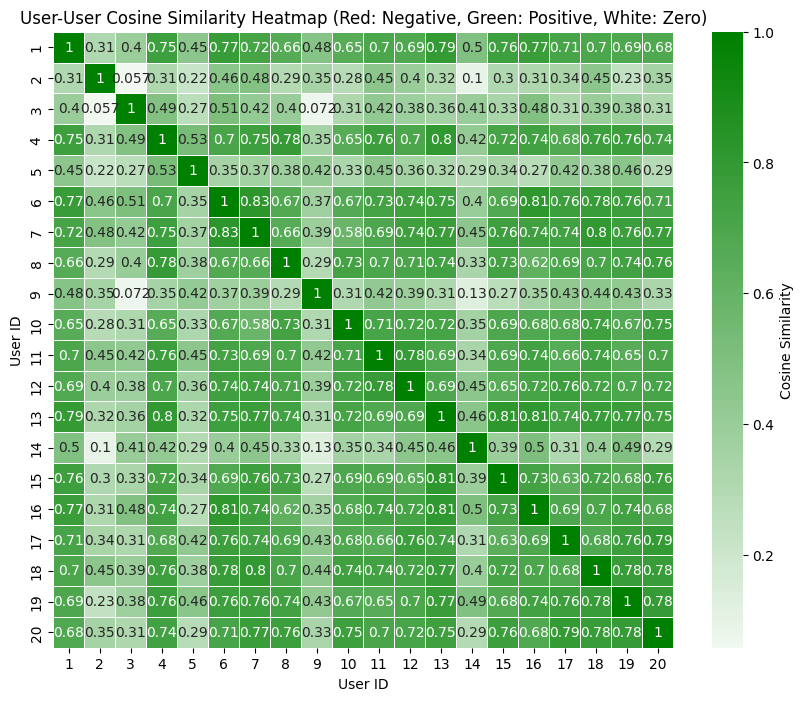

In [17]:
# Plot Cosine Similarity
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={'label': 'Cosine Similarity'})

# Title and labels
plt.title("User-User Cosine Similarity Heatmap (Red: Negative, Green: Positive, White: Zero)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()


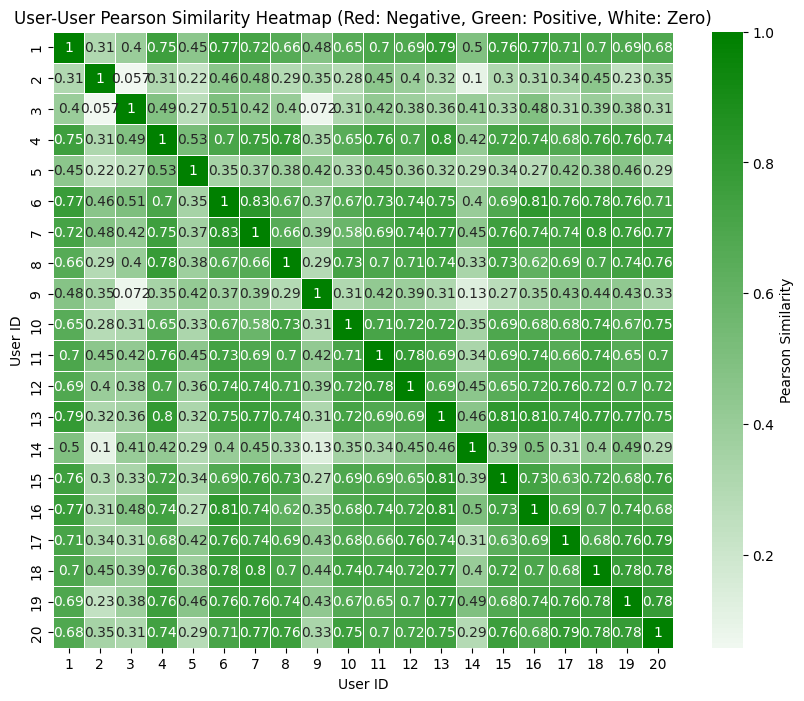

In [23]:
# Plot Pearson Similarity
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={'label': 'Pearson Similarity'})

# Title and labels
plt.title("User-User Pearson Similarity Heatmap (Red: Negative, Green: Positive, White: Zero)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()


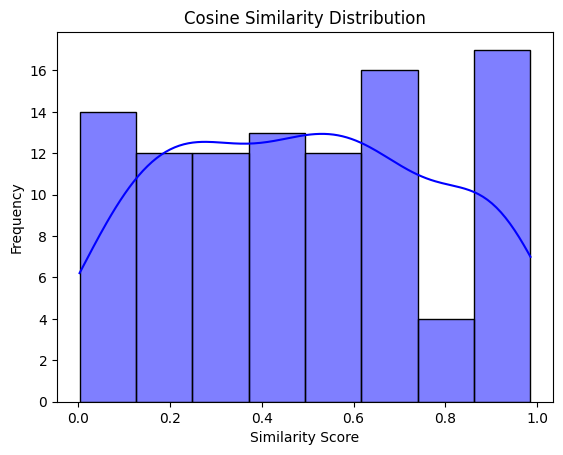

In [21]:
import seaborn as sns

# Example of Cosine Similarity values
similarity_values = np.random.rand(100)  # Replace with actual similarity scores

sns.histplot(similarity_values, kde=True, color="blue")
plt.title("Cosine Similarity Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()
